In [77]:
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [78]:
import seaborn as sns
from matplotlib import pyplot as plt

import os
df = pd.read_csv('Rose.csv')
df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [79]:
df.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [80]:
df1 = pd.read_csv("Rose.csv",parse_dates=True,squeeze=True,index_col=0)
df1.head()

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\1009958519.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_csv("Rose.csv",parse_dates=True,squeeze=True,index_col=0)


YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

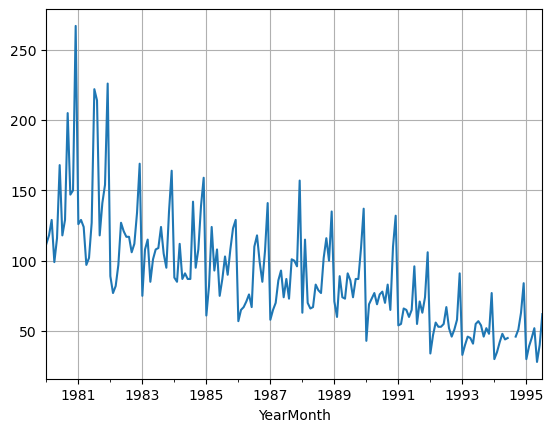

In [81]:
df1.plot();
plt.grid()

In [82]:
date = pd.date_range(start='1/1/1980', end='1/1/1996', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=192, freq='M')

In [83]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

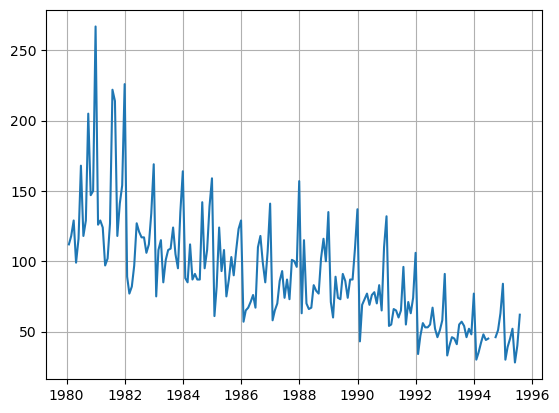

In [84]:
plt.plot(df['Time_Stamp'],df['Rose']);
plt.grid()

## Observations:
As we can see, thereis a downwards trending graph

In [85]:
df.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

## Observations:
As we can see, The total count of values is 185 with the mean of 90.3 and the minimum sales 39.1753 and maximum is 267

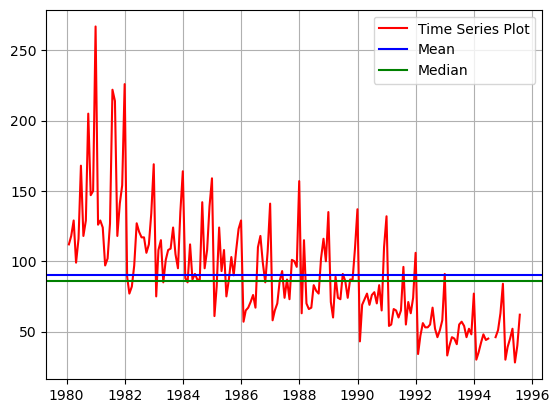

In [86]:
#df.plot(y="Rose",color='Red')
plt.plot(df['Time_Stamp'],df['Rose'],color='Red');
plt.axhline(df['Rose'].mean(),color='Blue')
plt.axhline(df['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

# EDA

In [87]:
df.set_index(keys='Time_Stamp',drop=True,inplace=True)
df.head()

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

C:\Users\Aniesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


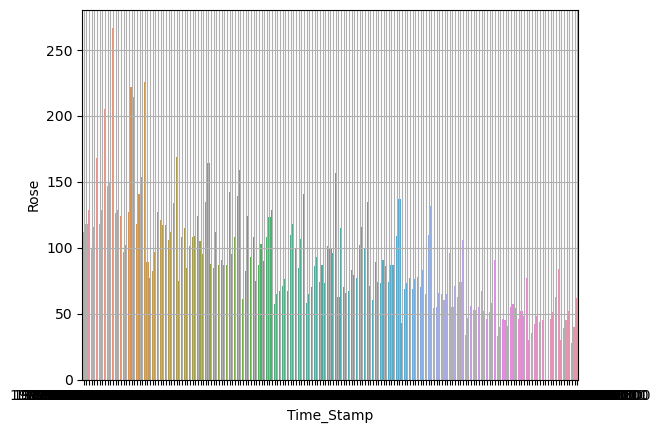

In [88]:
sns.barplot(df.index,df.Rose,data=df)
plt.grid();

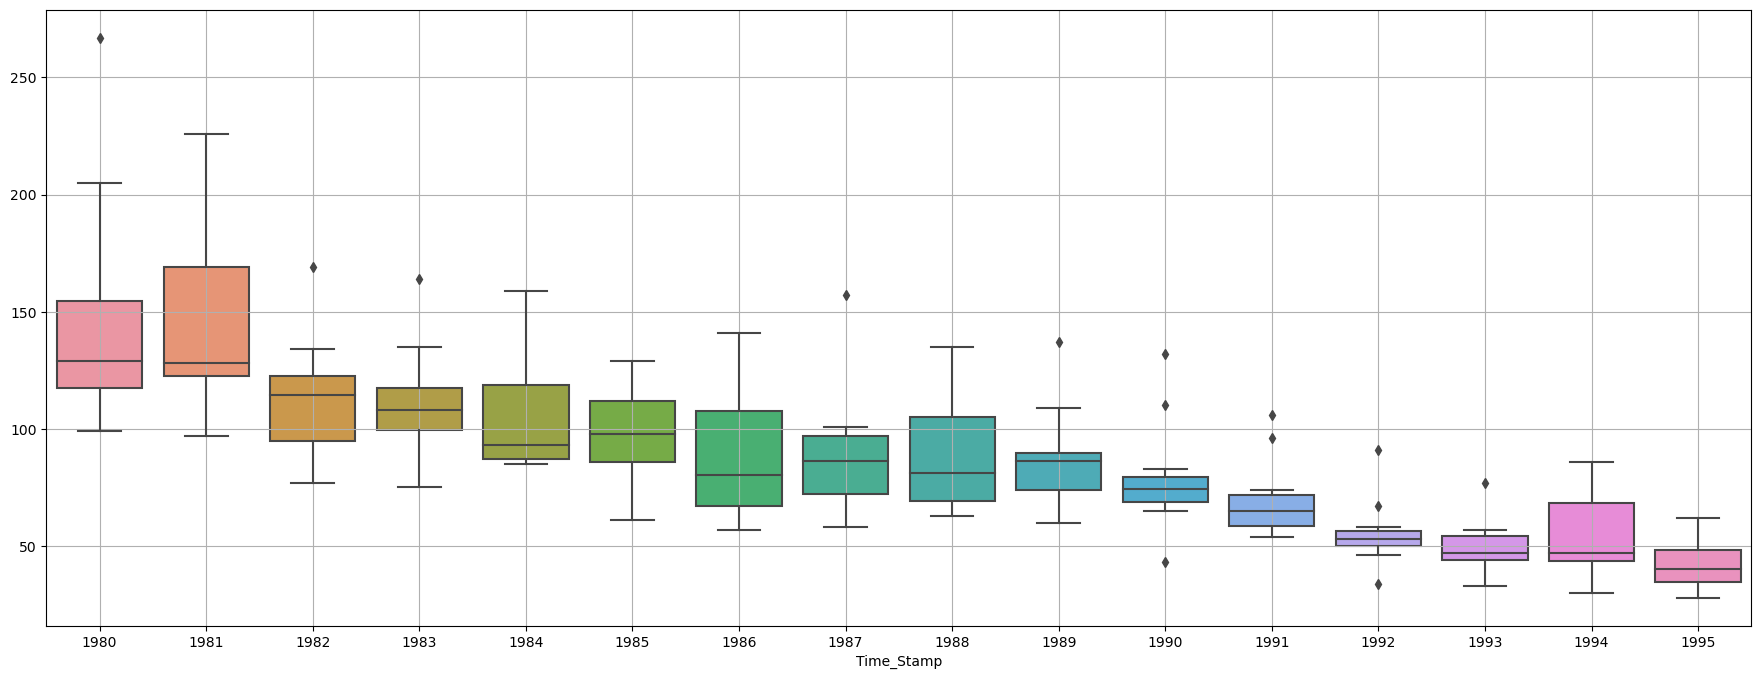

In [100]:
#Yearly Boxplot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

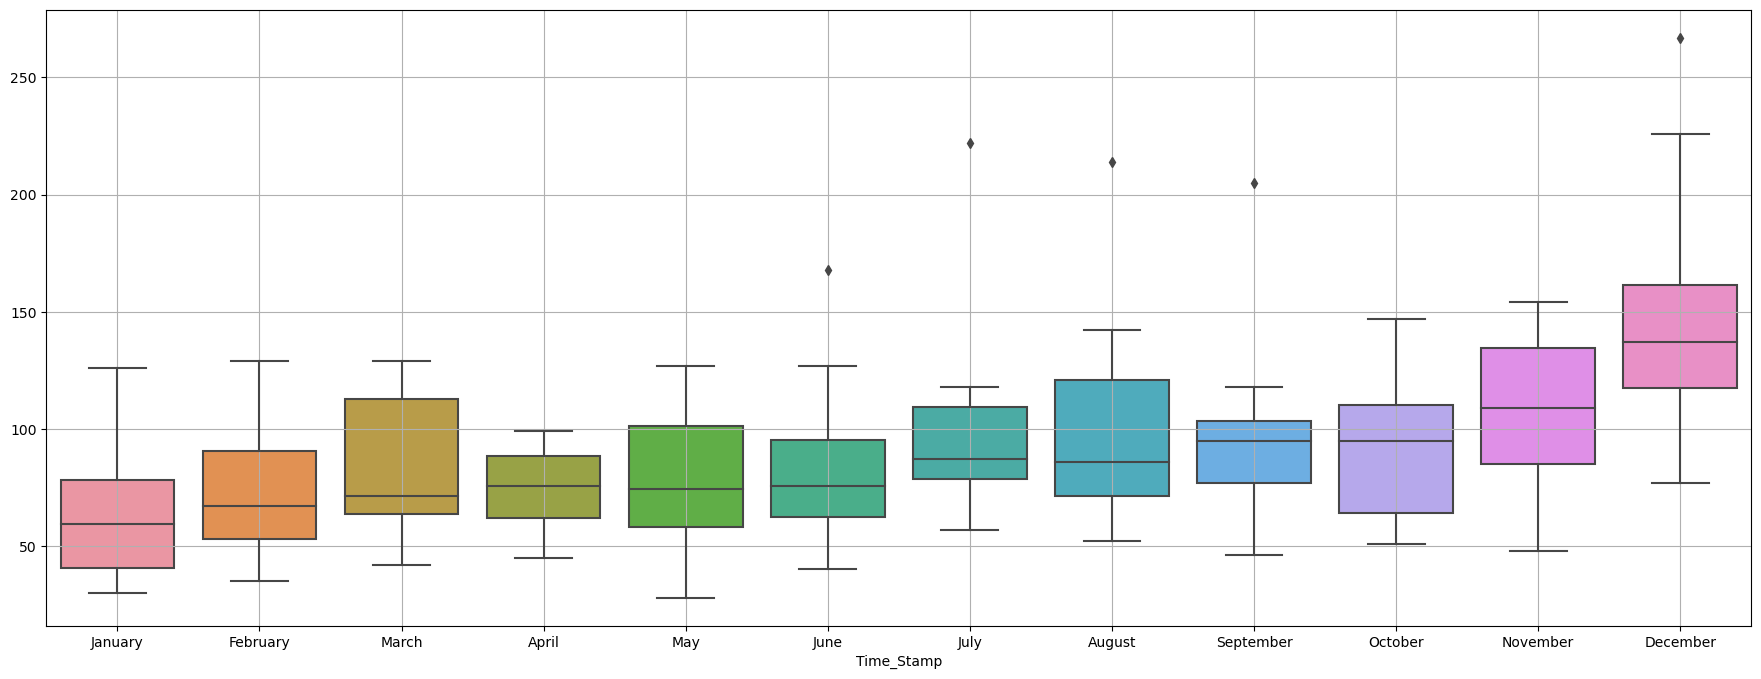

In [101]:
#Monthly Boxplot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [89]:
df.index.month_name

<bound method _inherit_from_data.<locals>.method of DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', name='Time_Stamp', length=187, freq=None)>

In [90]:
quarterly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
quarterly_sales_across_years

Time_Stamp  April  August  December  February  January   July   June  March  \
Time_Stamp                                                                    
1980         99.0   129.0     267.0     118.0    112.0  118.0  168.0  129.0   
1981         97.0   214.0     226.0     129.0    126.0  222.0  127.0  124.0   
1982         97.0   117.0     169.0      77.0     89.0  117.0  121.0   82.0   
1983         85.0   124.0     164.0     108.0     75.0  109.0  108.0  115.0   
1984         87.0   142.0     159.0      85.0     88.0   87.0   87.0  112.0   
1985         93.0   103.0     129.0      82.0     61.0   87.0   75.0  124.0   
1986         71.0   118.0     141.0      65.0     57.0  110.0   67.0   67.0   
1987         86.0    73.0     157.0      65.0     58.0   87.0   74.0   70.0   
1988         66.0    77.0     135.0     115.0     63.0   79.0   83.0   70.0   
1989         74.0    74.0     137.0      60.0     71.0   86.0   91.0   89.0   
1990         77.0    70.0     132.0      69.0     43.0   78.0   76.0   73.0   
1991         65.0    55.0     106.0      55.0     54.0   96.0   65.0   66.0   
1992         53.0    52.0      91.0      47.0     34.0   67.0   55.0   56.0   
1993         45.0    54.0      77.0      40.0     33.0   57.0   55.0   46.0   
1994         48.0     NaN      84.0      35.0     30.0    NaN   45.0   42.0   
1995         52.0     NaN       NaN      39.0     30.0   62.0   40.0   45.0   

Time_Stamp    May  November  October  September  
Time_Stamp                                       
1980        116.0     150.0    147.0      205.0  
1981        102.0     154.0    141.0      118.0  
1982        127.0     134.0    112.0      106.0  
1983        101.0     135.0     95.0      105.0  
1984         91.0     139.0    108.0       95.0  
1985        108.0     123.0    108.0       90.0  
1986         76.0     107.0     85.0       99.0  
1987         93.0      96.0    100.0      101.0  
1988         67.0     100.0    116.0      102.0  
1989         73.0     109.0     87.0       87.0  
1990         69.0     110.0     65.0       83.0  
1991         60.0      74.0     63.0       71.0  
1992         53.0      58.0     51.0       46.0  
1993         41.0      48.0     52.0       46.0  
1994         44.0      63.0     51.0       46.0  
1995         28.0       NaN      NaN        NaN

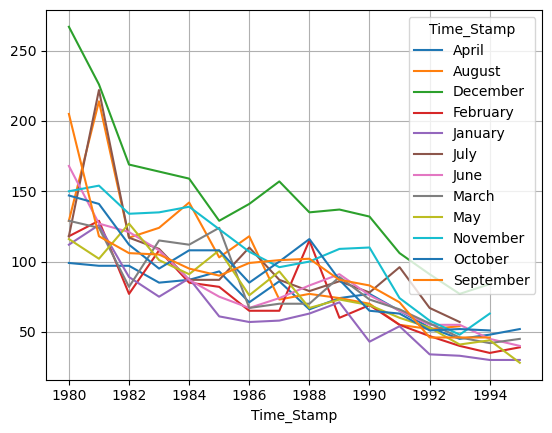

In [91]:
quarterly_sales_across_years.plot()
plt.grid()

## Observations:
As we can see, The quaterly sales across the years

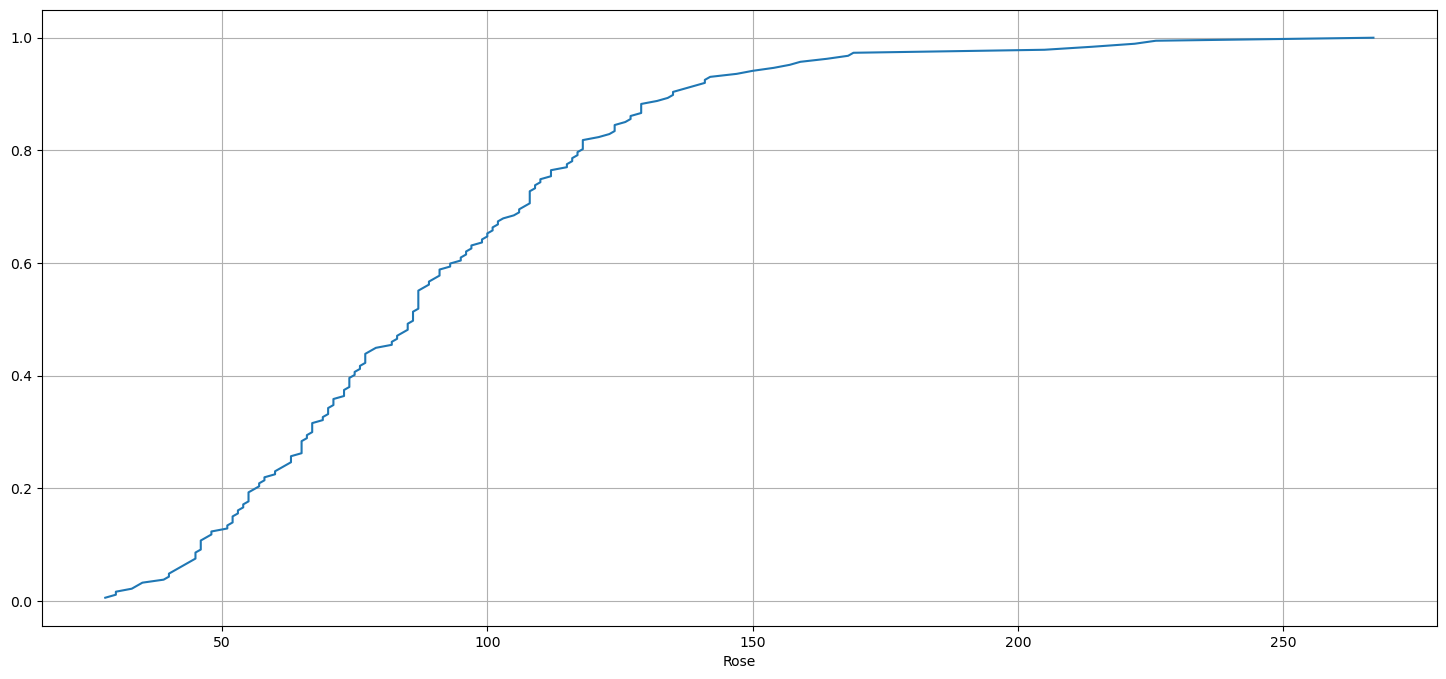

In [252]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose');

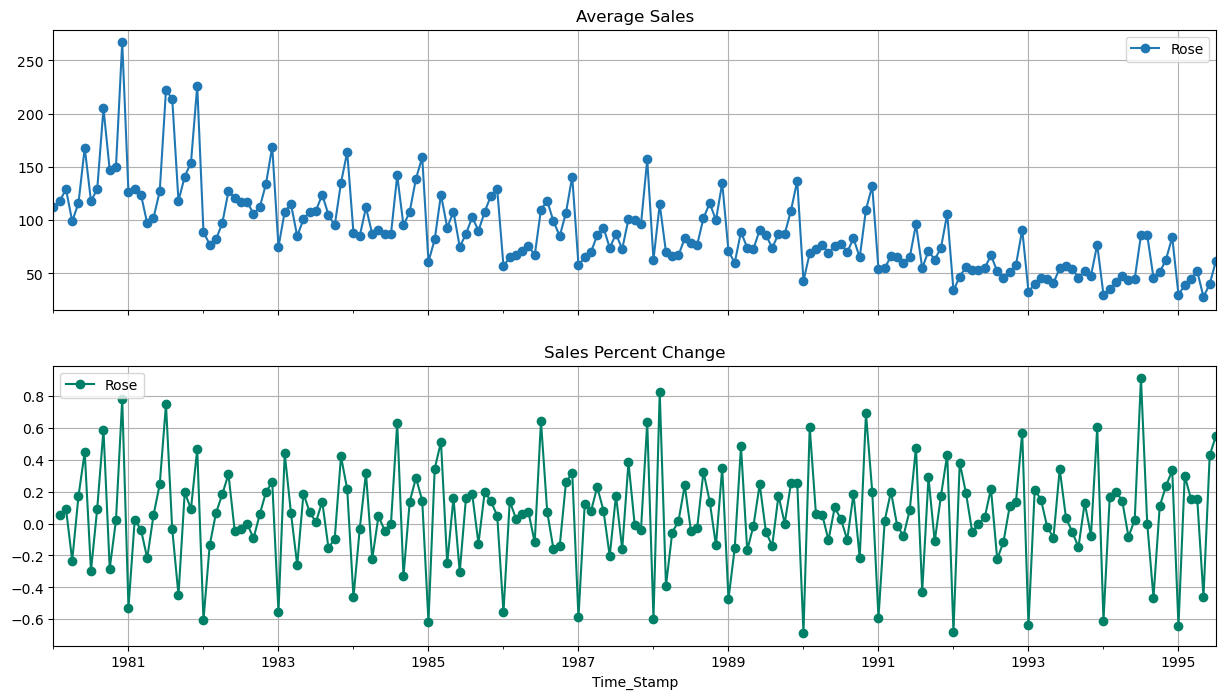

In [254]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

# Data Preprocessing
## Treating missing Values

In [92]:
df.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

## Observations:
As we can see there are 2 missing values that need to be imputed

In [93]:
df.dtypes

YearMonth     object
Rose         float64
dtype: object

In [94]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()   

YearMonth    0
Rose         0
dtype: int64

## Observations:
We have removed missing values

# Decomposing Time Series

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [96]:
df.drop(labels=['YearMonth'],axis=1,inplace=True)
df.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

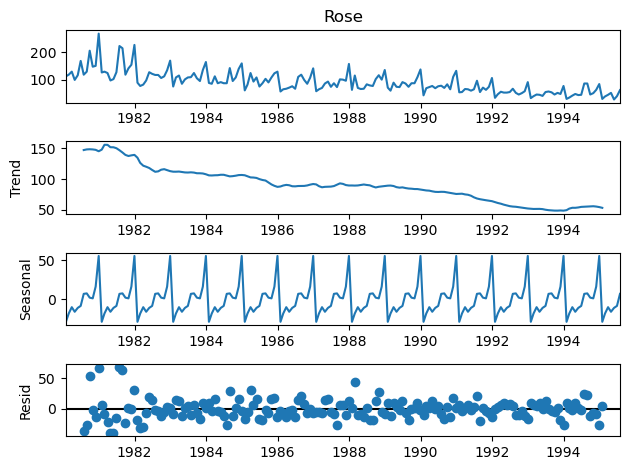

In [256]:
#Additive Decomposition

decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

## Observations:
We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [257]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -28.355258
1980-02-29   -17.794345
1980-03-31    -9.764583
1980-04-30   -15.577083
1980-05-31   -10.675298
1980-06-30    -8.157440
1980-07-31     7.161409
1980-08-31     7.741964
1980-09-30     2.328075
1980-10-31     1.425298
1980-11-30    16.400298
1980-12-31    55.266964
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -36.244742
1980-08-31   -26.866964
1980-09-30    54.296925
1980-10-31    -2.508631
1980-11-30   -13.816964
1980-12-31    66.60

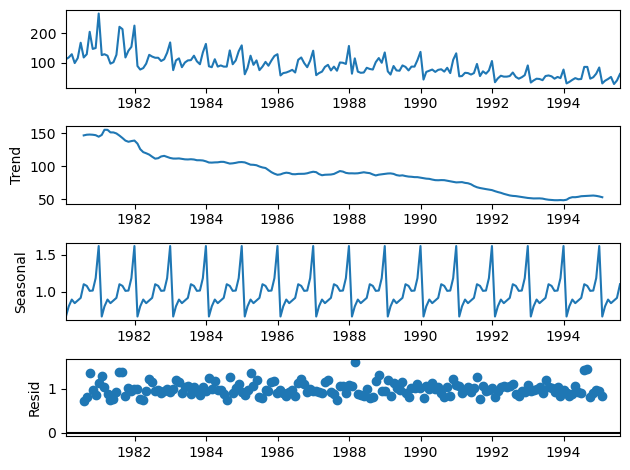

In [76]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

## Observations:
For the multiplicative series, we see that a lot of residuals are located around 1. Thus Multiplicative Decomposition is the right way to decompose the time series
Also it is evident that there is a 12 month seasonality in the data from the above plots
We have successfully decomposed timer series into trend seasonality and residue

In [97]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [98]:
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
1981-01-31    147.750000
1981-02-28    155.625000
1981-03-31    155.541667
1981-04-30    151.666667
1981-05-31    151.583333
1981-06-30    150.041667
1981-07-31    146.791667
1981-08-31    143.083333
1981-09-30    139.166667
1981-10-31    137.416667
1981-11-30    138.458333
1981-12-31    139.250000
1982-01-31    134.625000
1982-02-28    126.208333
1982-03-31    121.666667
1982-04-30    119.958333
1982-05-31    117.916667
1982-06-30    114.708333
1982-07-31    111.750000
1982-08-31    112.458333
1982-09-30    115.125000
1982-10-31    116.000000
1982-11-30    114.416667
1982-12-31    112.791667
1983-01-31    111.916667
1983-02-28    111.875000
1983-03-31    112.125000
1983-0

# Split the data into train and test and plot the training and test data.

In [102]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

In [103]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


In [104]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
             Rose
Time_Stamp      
1990-06-30  76.0
1990-07-31  78.0
1990-08-31  70.0
1990-09-30  83.0
1990-10-31  65.0 

First few rows of Test Data 
              Rose
Time_Stamp       
1990-11-30  110.0
1990-12-31  132.0
1991-01-31   54.0
1991-02-28   55.0
1991-03-31   66.0 

Last few rows of Test Data 
             Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



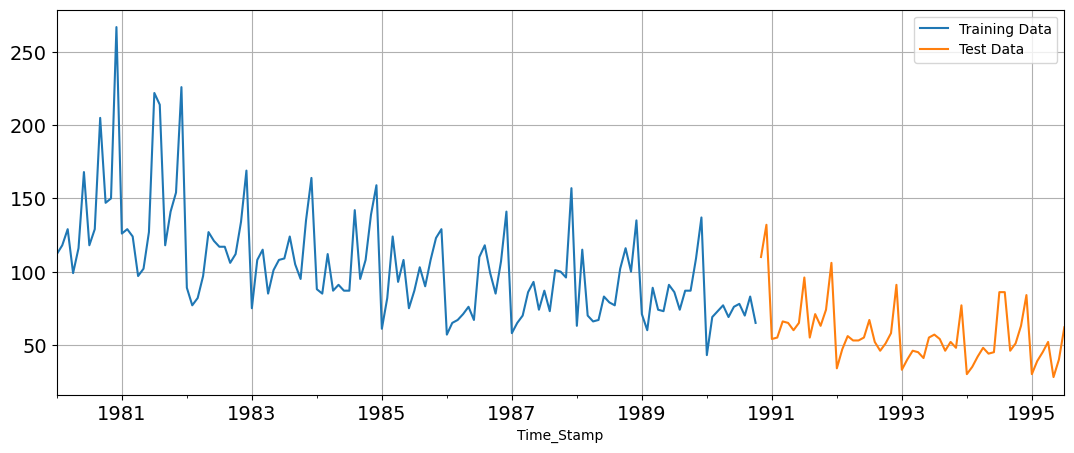

In [106]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Building different models and comparing the accuracy metrics.

## Linear Regression

In [107]:
# Model 1: Linear Regression
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [108]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
             Rose  time
Time_Stamp            
1990-06-30  76.0   126
1990-07-31  78.0   127
1990-08-31  70.0   128
1990-09-30  83.0   129
1990-10-31  65.0   130 

First few rows of Test Data 
              Rose  time
Time_Stamp             
1990-11-30  110.0    43
1990-12-31  132.0    44
1991-01-31   54.0    45
1991-02-28   55.0    46
1991-03-31   66.0    47 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0    95
1995-04-30  52.0    96
1995-05-31  28.0    97
1995-06-30  40.0    98
1995-07-31  62.0    99 



In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

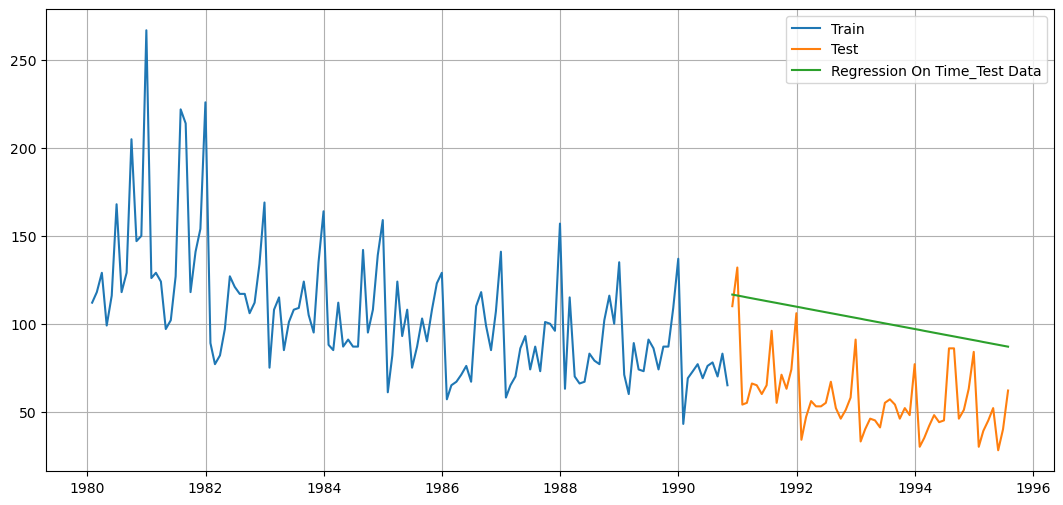

In [112]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [114]:
#Defining the accuracy metrics.
from sklearn import metrics
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 47.95


In [115]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  47.951776

## Method 2: Moving Average(MA)

In [116]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [118]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

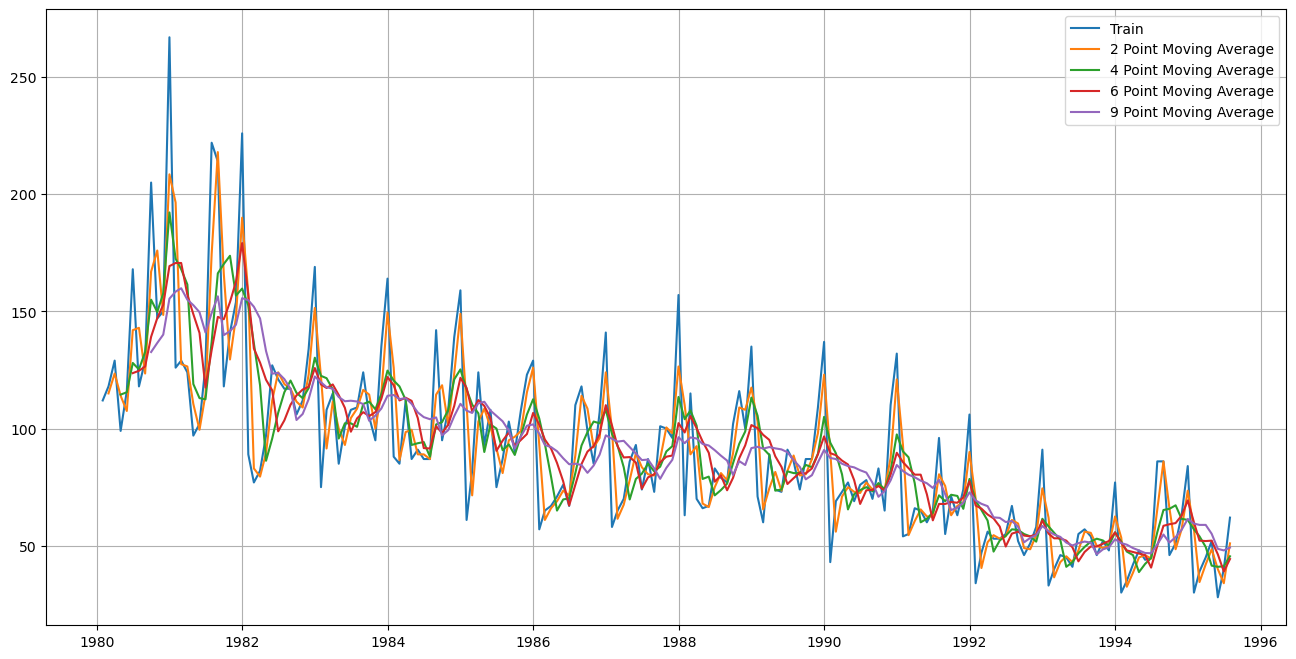

In [119]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [120]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

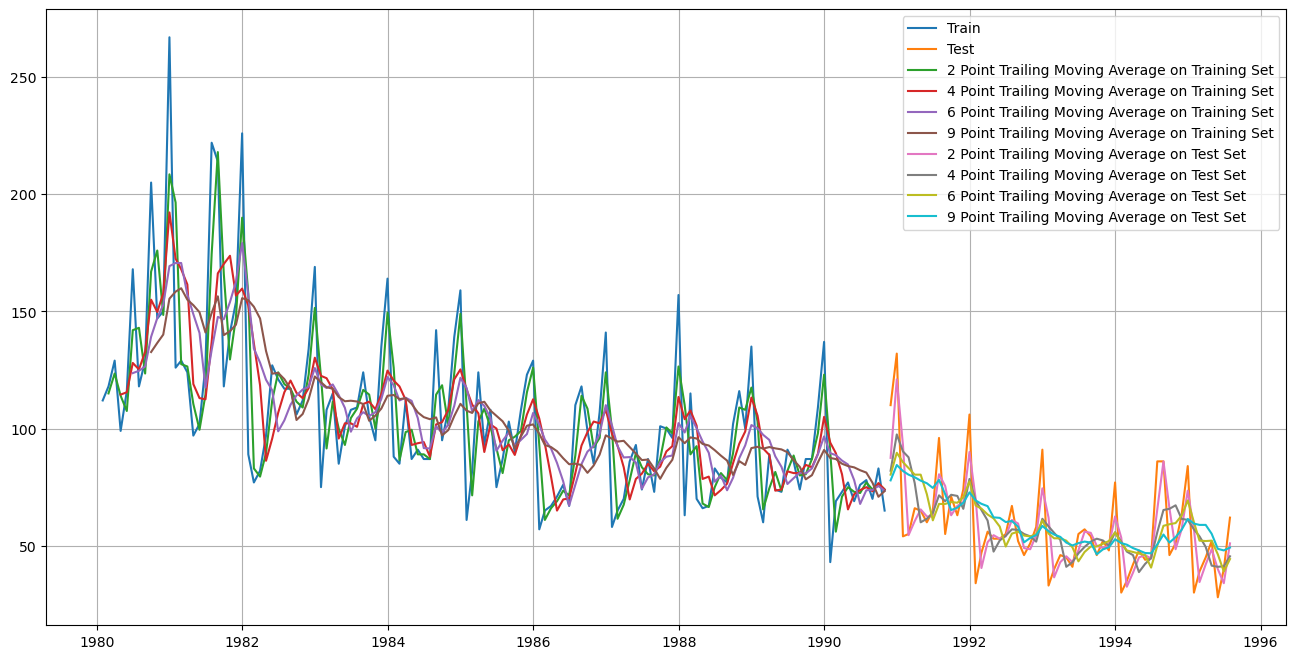

In [121]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [123]:
#Model Evaluation
#RMSE calculation
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 12.396
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 16.390
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 16.862
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 17.601 


In [124]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             47.951776
2pointTrailingMovingAverage  12.395705
4pointTrailingMovingAverage  16.389817
6pointTrailingMovingAverage  16.862447
9pointTrailingMovingAverage  17.600714

## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

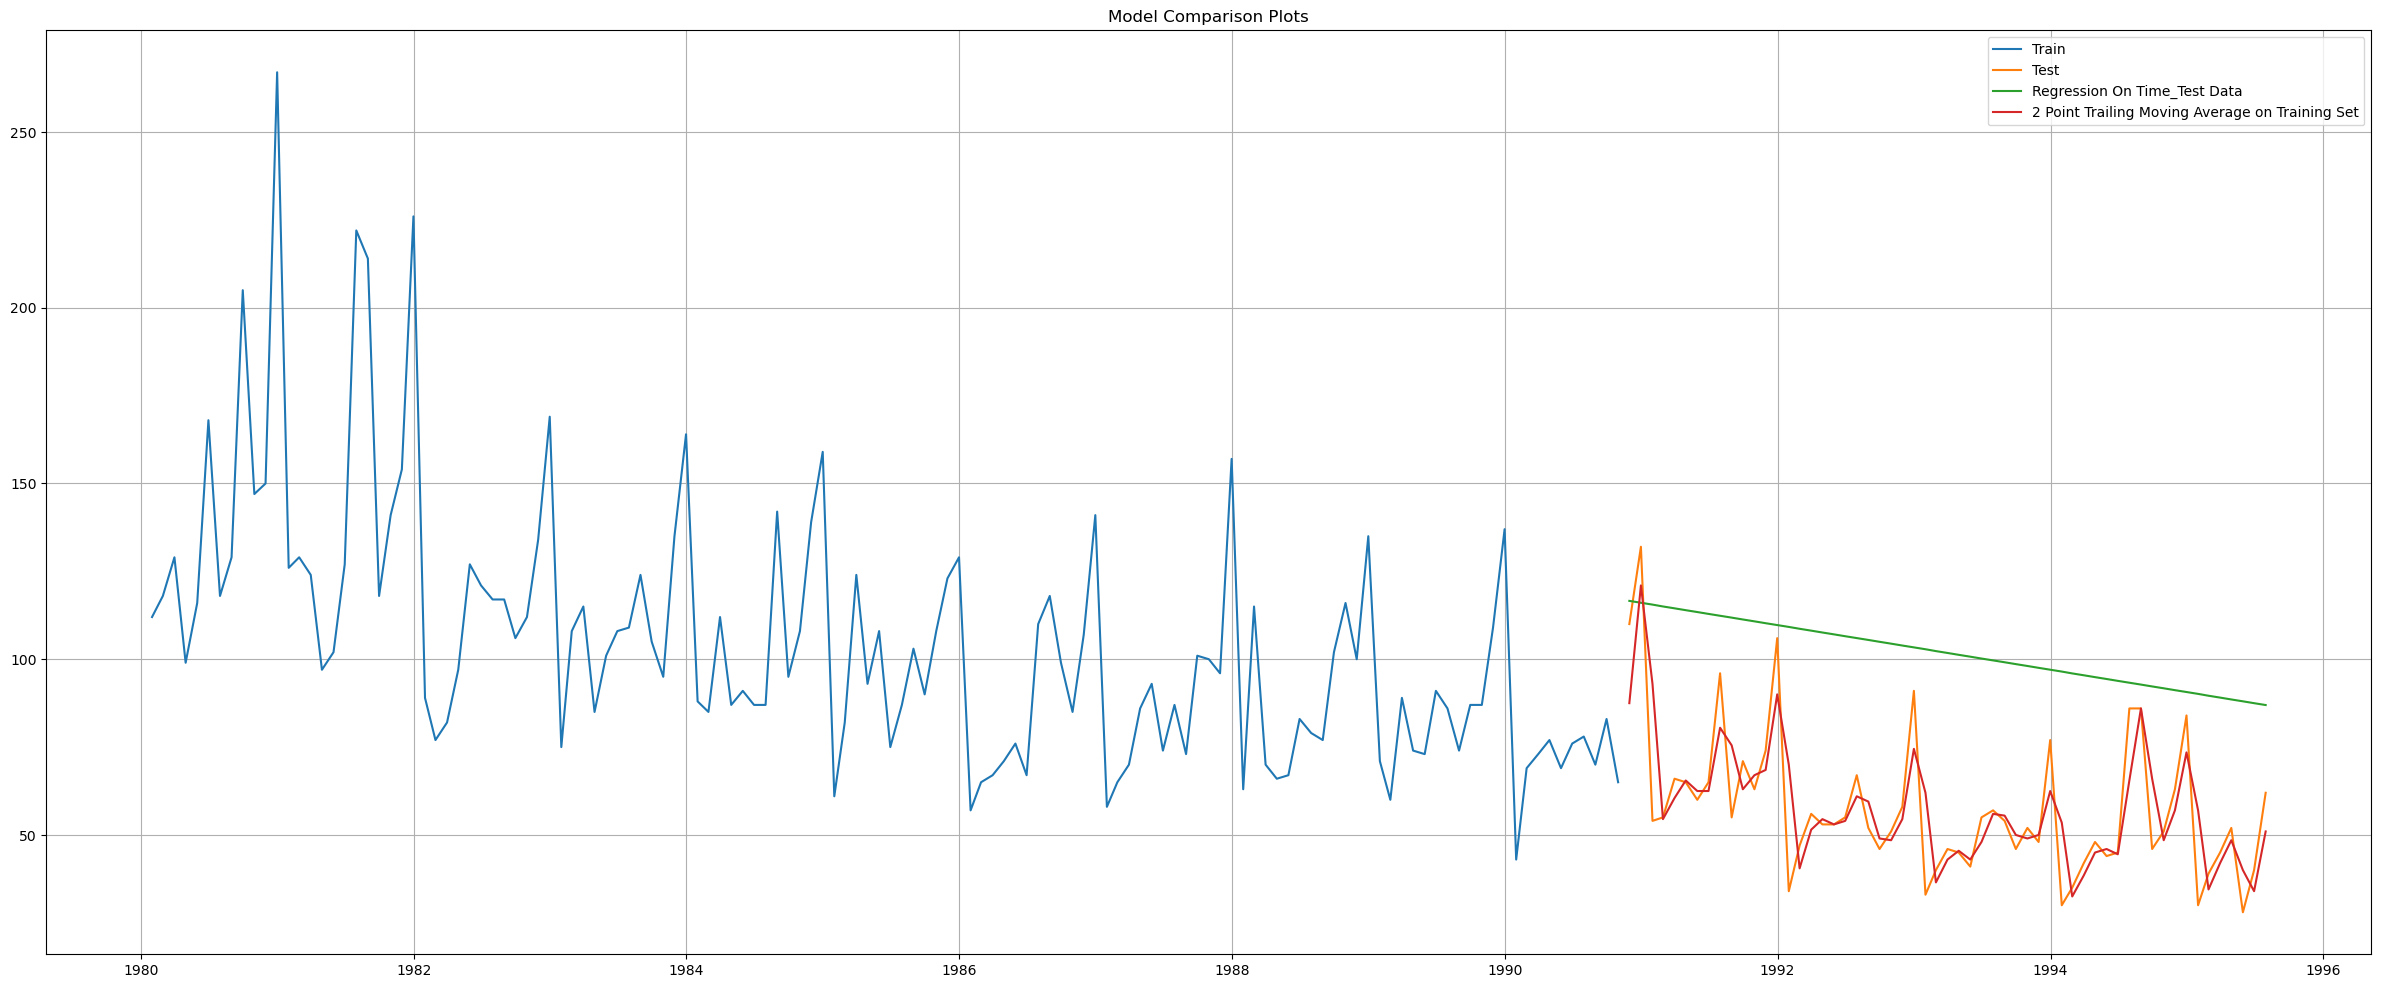

In [125]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Method 3: Simple Exponential Smoothing

In [127]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [128]:
SES_train = train.copy()
SES_test = test.copy()

In [129]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\Aniesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [131]:
model_SES_autofit = model_SES.fit(optimized=True)

In [132]:
model_SES_autofit.params

{'smoothing_level': 0.10272103999437467,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.26298733829412,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [133]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
Time_Stamp                  
1990-11-30  110.0  78.899522
1990-12-31  132.0  78.899522
1991-01-31   54.0  78.899522
1991-02-28   55.0  78.899522
1991-03-31   66.0  78.899522

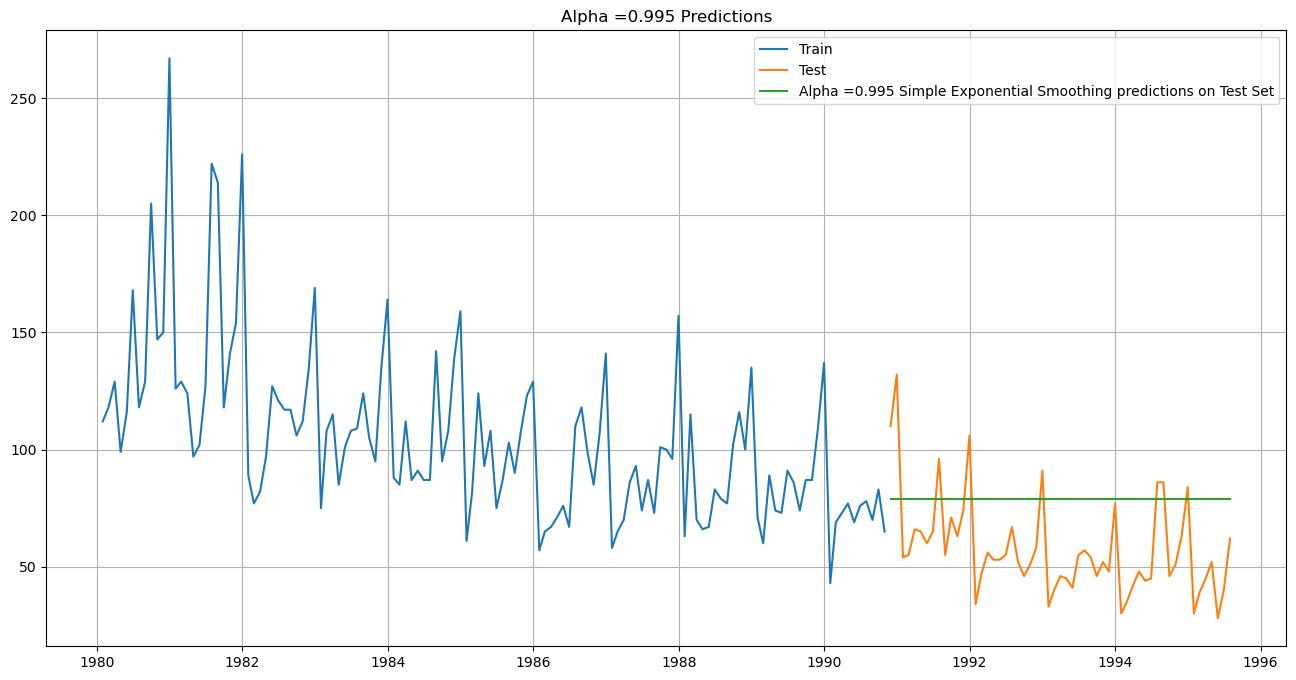

In [156]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

Model Evaluation for α
 = 0.995 : Simple Exponential Smoothing

In [157]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 29.563


In [158]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                         47.951776
2pointTrailingMovingAverage              12.395705
4pointTrailingMovingAverage              16.389817
6pointTrailingMovingAverage              16.862447
9pointTrailingMovingAverage              17.600714
Alpha=0.995,SimpleExponentialSmoothing   29.562842
Alpha=0.995,SimpleExponentialSmoothing   29.562842
Alpha=0.1027,SimpleExponentialSmoothing  29.562842
Alpha=0.995,SimpleExponentialSmoothing   29.562842

Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [159]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [160]:
for i in np.arange(0.1, 1, 0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i, optimized=False, use_brute=True)
    
    # Store the fitted values in the training set
    SES_train[('predict', i)] = model_SES_alpha_i.fittedvalues
    SES_test[('predict', i)] = model_SES_alpha_i.forecast(steps=18)
    
    # Impute NaN values in SES_train['predict', i] with forward and backward filling
    SES_train[('predict', i)] = SES_train[('predict', i)].fillna(method='ffill').fillna(method='bfill')
    
    # Impute NaN values in SES_test['predict', i] with forward and backward filling
    SES_test[('predict', i)] = SES_test[('predict', i)].fillna(method='ffill').fillna(method='bfill')
    
    # Calculate RMSE for training and testing datasets
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'], SES_train[('predict', i)], squared=False)
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'], SES_test[('predict', i)], squared=False)
    
    # Append the results to the results dataframe
    resultsDf_6 = resultsDf_6.append({'Alpha Values': i, 'Train RMSE': rmse_model5_train_i, 'Test RMSE': rmse_model5_test_i}, ignore_index=True)

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\885861567.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values': i, 'Train RMSE': rmse_model5_train_i, 'Test RMSE': rmse_model5_test_i}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\885861567.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values': i, 'Train RMSE': rmse_model5_train_i, 'Test RMSE': rmse_model5_test_i}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\885861567.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values': i, 'Train RMSE': rmse_model5_train_i, 'Test RMSE': rmse_mod

In [162]:
#Model Evaluation
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
8           0.9   37.507371  22.438119
7           0.8   36.330954  23.066040
6           0.7   35.288467  23.675796
5           0.6   34.372651  24.251052
4           0.5   33.578304  24.781696
3           0.4   32.893017  25.287313
2           0.3   32.292266  25.893509
1           0.2   31.779467  26.991653
0           0.1   31.643829  29.679907

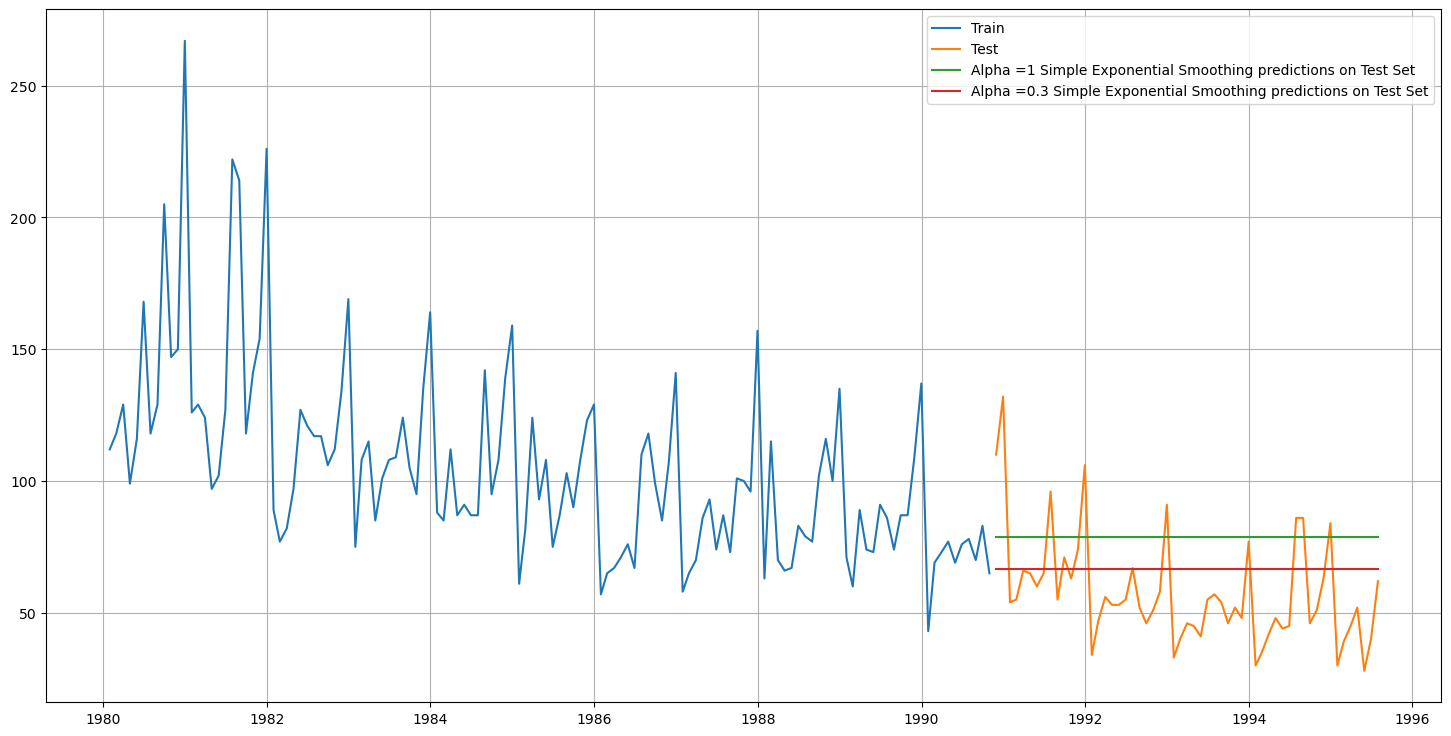

In [165]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.9], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [166]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.9,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                         47.951776
2pointTrailingMovingAverage              12.395705
4pointTrailingMovingAverage              16.389817
6pointTrailingMovingAverage              16.862447
9pointTrailingMovingAverage              17.600714
Alpha=0.995,SimpleExponentialSmoothing   29.562842
Alpha=0.995,SimpleExponentialSmoothing   29.562842
Alpha=0.1027,SimpleExponentialSmoothing  29.562842
Alpha=0.995,SimpleExponentialSmoothing   29.562842
Alpha=0.3,SimpleExponentialSmoothing     22.438119
Alpha=0.9,SimpleExponentialSmoothing     22.438119

## Method 4: Double Exponential Smoothing (Holt's Model)
Two parameters α
 and β
 are estimated in this model. Level and Trend are accounted for in this model.

In [168]:
DES_train = train.copy()
DES_test = test.copy()

In [169]:
model_DES = Holt(DES_train['Rose'])

C:\Users\Aniesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [170]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [172]:
# Initialize an empty DataFrame to store the results
resultsDf_7 = pd.DataFrame(columns=['Alpha Values', 'Beta Values', 'Train RMSE', 'Test RMSE'])

# Loop through alpha and beta values
for alpha in np.arange(0.3, 1.1, 0.1):
    for beta in np.arange(0.3, 1.1, 0.1):
        # Fit the Double Exponential Smoothing model with current alpha and beta values
        model_DES_alpha_beta = model_DES.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False, use_brute=True)
        
        # Store the fitted values in the training and test datasets
        DES_train[('predict', alpha, beta)] = model_DES_alpha_beta.fittedvalues
        DES_test[('predict', alpha, beta)] = model_DES_alpha_beta.forecast(steps=18)
        
        # Fill NaN values using forward fill and backward fill in the predicted values
        DES_train[('predict', alpha, beta)] = DES_train[('predict', alpha, beta)].fillna(method='ffill').fillna(method='bfill')
        DES_test[('predict', alpha, beta)] = DES_test[('predict', alpha, beta)].fillna(method='ffill').fillna(method='bfill')
        
        # Calculate RMSE for training and testing data
        rmse_train = metrics.mean_squared_error(DES_train['Rose'], DES_train[('predict', alpha, beta)], squared=False)
        rmse_test = metrics.mean_squared_error(DES_test['Rose'], DES_test[('predict', alpha, beta)], squared=False)
        
        # Append the results to the DataFrame
        resultsDf_7 = resultsDf_7.append({
            'Alpha Values': alpha,
            'Beta Values': beta,
            'Train RMSE': rmse_train,
            'Test RMSE': rmse_test
        }, ignore_index=True)

# Print the results DataFrame
print(resultsDf_7)

# Find the combination of alpha and beta with the lowest Test RMSE
best_alpha_beta = resultsDf_7.loc[resultsDf_7['Test RMSE'].idxmin()]
print(f"Best Alpha: {best_alpha_beta['Alpha Values']}, Best Beta: {best_alpha_beta['Beta Values']}, Test RMSE: {best_alpha_beta['Test RMSE']}")


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\930840424.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\930840424.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\930840424.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\930840424.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_207

    Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.3          0.3   35.792345   18.940252
1            0.3          0.4   37.287813   19.151211
2            0.3          0.5   38.841090   25.044564
3            0.3          0.6   40.299159   39.516269
4            0.3          0.7   41.486887   57.006992
5            0.3          0.8   42.292540   66.873700
6            0.3          0.9   42.740412   61.032725
7            0.3          1.0   42.963771   40.253092
8            0.4          0.3   36.682435   18.835579
9            0.4          0.4   37.990913   21.942513
10           0.4          0.5   39.133380   27.754999
11           0.4          0.6   40.041257   29.479936
12           0.4          0.7   40.744796   22.875321
13           0.4          0.8   41.339769   19.125512
14           0.4          0.9   41.922781   36.556063
15           0.4          1.0   42.559118   60.969858
16           0.5          0.3   37.421741   18.630273
17           0.5          0.

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\930840424.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7 = resultsDf_7.append({


In [173]:
#Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
18           0.5          0.5   39.634983  18.462692
16           0.5          0.3   37.421741  18.630273
8            0.4          0.3   36.682435  18.835579
0            0.3          0.3   35.792345  18.940252
17           0.5          0.4   38.598226  18.944095

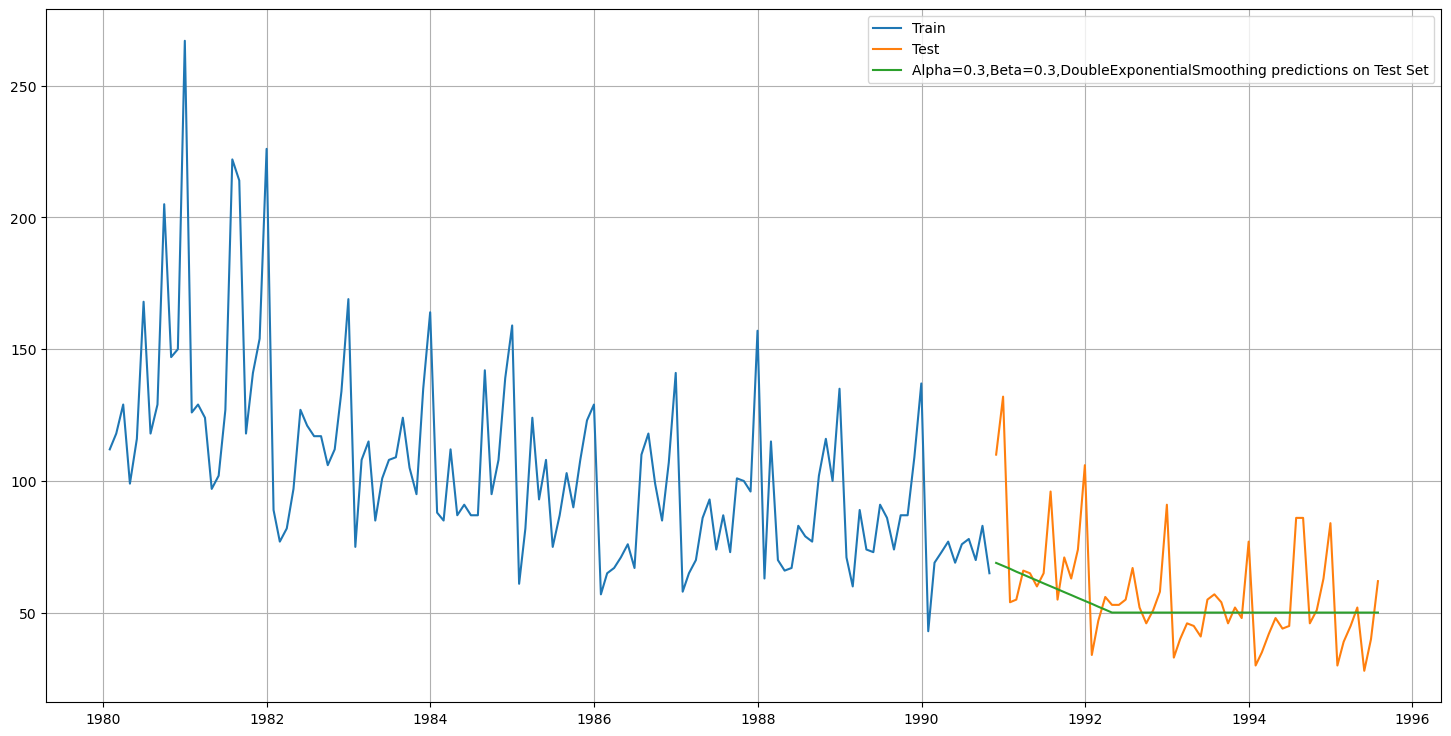

In [175]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [176]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                               47.951776
2pointTrailingMovingAverage                    12.395705
4pointTrailingMovingAverage                    16.389817
6pointTrailingMovingAverage                    16.862447
9pointTrailingMovingAverage                    17.600714
Alpha=0.995,SimpleExponentialSmoothing         29.562842
Alpha=0.995,SimpleExponentialSmoothing         29.562842
Alpha=0.1027,SimpleExponentialSmoothing        29.562842
Alpha=0.995,SimpleExponentialSmoothing         29.562842
Alpha=0.3,SimpleExponentialSmoothing           22.438119
Alpha=0.9,SimpleExponentialSmoothing           22.438119
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  18.462692

# Method 5: Triple Exponential Smoothing (Holt - Winter's Model)
Three parameters α
, β
 and γ
 are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [177]:
TES_train = train.copy()
TES_test = test.copy()

In [178]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [179]:
model_TES_autofit = model_TES.fit()

In [180]:
model_TES_autofit.params

{'smoothing_level': 0.09941326775571543,
 'smoothing_trend': 2.4733033543760145e-09,
 'smoothing_seasonal': 2.2407585658472406e-07,
 'damping_trend': nan,
 'initial_level': 159.83733634496218,
 'initial_trend': -0.6452822286294049,
 'initial_seasons': array([0.68601845, 0.77534772, 0.84776999, 0.74348018, 0.83458381,
        0.89900006, 0.98970025, 1.05839694, 0.99093964, 0.97471991,
        1.12073306, 1.54535628]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [181]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict
Time_Stamp                     
1990-11-30  110.0     86.304029
1990-12-31  132.0    118.005690
1991-01-31   54.0     51.942705
1991-02-28   55.0     58.206068
1991-03-31   66.0     63.095821

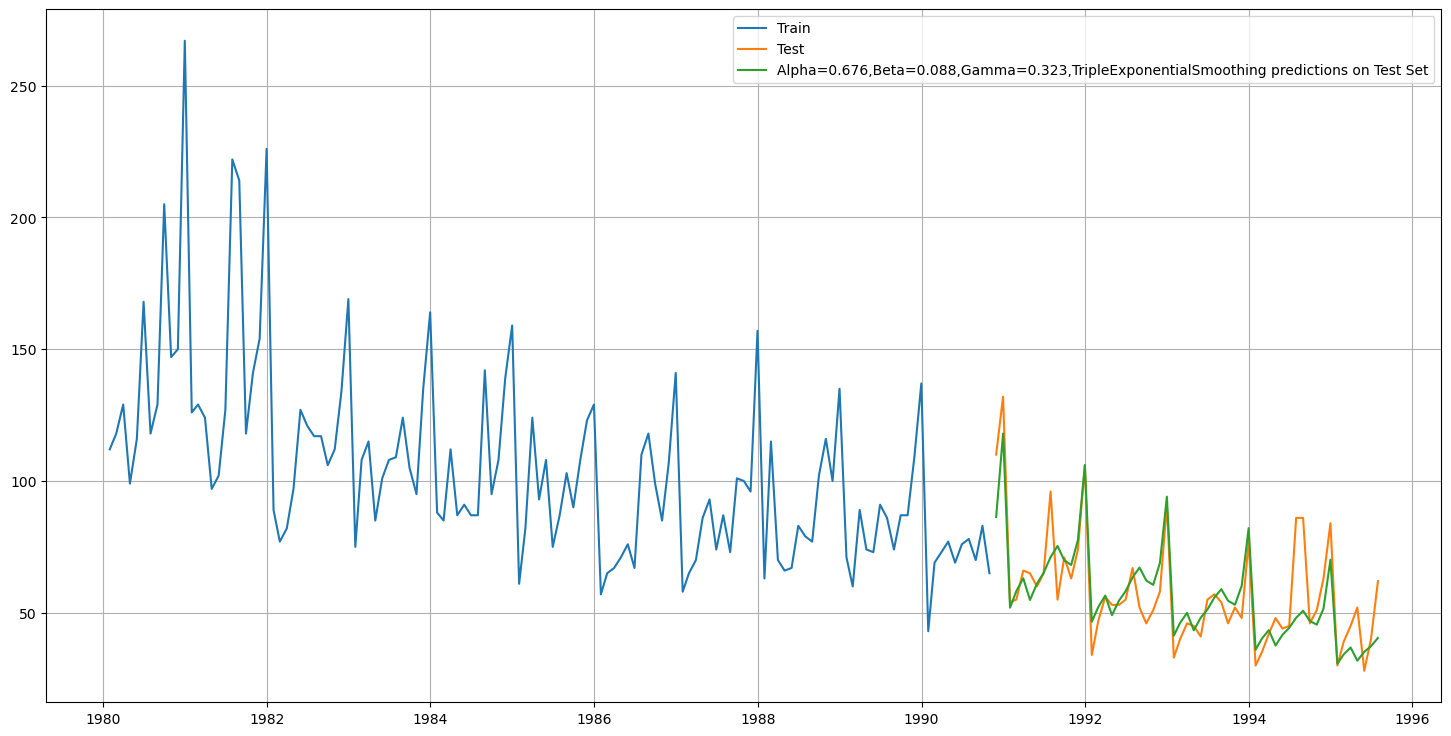

In [182]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [184]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 11.547


In [185]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    47.951776
2pointTrailingMovingAverage                         12.395705
4pointTrailingMovingAverage                         16.389817
6pointTrailingMovingAverage                         16.862447
9pointTrailingMovingAverage                         17.600714
Alpha=0.995,SimpleExponentialSmoothing              29.562842
Alpha=0.995,SimpleExponentialSmoothing              29.562842
Alpha=0.1027,SimpleExponentialSmoothing             29.562842
Alpha=0.995,SimpleExponentialSmoothing              29.562842
Alpha=0.3,SimpleExponentialSmoothing                22.438119
Alpha=0.9,SimpleExponentialSmoothing                22.438119
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18.462692
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...  11.546799

In [186]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [187]:
import numpy as np
from sklearn import metrics
import pandas as pd

# Initialize an empty DataFrame to store the results
resultsDf_8_2 = pd.DataFrame(columns=['Alpha Values', 'Beta Values', 'Gamma Values', 'Train RMSE', 'Test RMSE'])

# Loop through alpha, beta, and gamma values
for alpha in np.arange(0.3, 1.1, 0.1):
    for beta in np.arange(0.3, 1.1, 0.1):
        for gamma in np.arange(0.3, 1.1, 0.1):
            # Fit the Triple Exponential Smoothing model with the current alpha, beta, and gamma values
            model_TES_alpha_beta_gamma = model_TES.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, optimized=False, use_brute=True)
            
            # Store the fitted values in the training and test datasets
            TES_train[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.fittedvalues
            TES_test[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.forecast(steps=18)
            
            # Fill NaN values using forward fill and backward fill in the predicted values
            TES_train[('predict', alpha, beta, gamma)] = TES_train[('predict', alpha, beta, gamma)].fillna(method='ffill').fillna(method='bfill')
            TES_test[('predict', alpha, beta, gamma)] = TES_test[('predict', alpha, beta, gamma)].fillna(method='ffill').fillna(method='bfill')
            
            # Calculate RMSE for training and test sets
            rmse_train = metrics.mean_squared_error(TES_train['Rose'], TES_train[('predict', alpha, beta, gamma)], squared=False)
            rmse_test = metrics.mean_squared_error(TES_test['Rose'], TES_test[('predict', alpha, beta, gamma)], squared=False)
            
            # Append the results to the DataFrame
            resultsDf_8_2 = resultsDf_8_2.append({
                'Alpha Values': alpha,
                'Beta Values': beta,
                'Gamma Values': gamma,
                'Train RMSE': rmse_train,
                'Test RMSE': rmse_test
            }, ignore_index=True)

# Print the results DataFrame
print(resultsDf_8_2)

# Find the combination of alpha, beta, and gamma with the lowest Test RMSE
best_alpha_beta_gamma = resultsDf_8_2.loc[resultsDf_8_2['Test RMSE'].idxmin()]
print(f"Best Alpha: {best_alpha_beta_gamma['Alpha Values']}, Best Beta: {best_alpha_beta_gamma['Beta Values']}, Best Gamma: {best_alpha_beta_gamma['Gamma Values']}, Test RMSE: {best_alpha_beta_gamma['Test RMSE']}")

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Loca

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Loca

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.forecast(steps=18)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.fittedvalues
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `new

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.fittedvalues
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.forecast(steps=18)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and wil

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.forecast(steps=18)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.fittedvalues
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.forecast(steps=18)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and wil

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.forecast(steps=18)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.forecast(steps=18)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.fittedvalues
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `new

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.forecast(steps=18)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.forecast(steps=18)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.fittedvalues
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.forecast(steps=18)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and wil

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.forecast(steps=18)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.forecast(steps=18)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use

C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.fittedvalues
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.forecast(steps=18)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and wil

     Alpha Values  Beta Values  Gamma Values    Train RMSE    Test RMSE
0             0.3          0.3           0.3     23.385275    34.720826
1             0.3          0.3           0.4     24.663714    37.416239
2             0.3          0.3           0.5     26.315722    42.652027
3             0.3          0.3           0.6     28.443126    48.258820
4             0.3          0.3           0.7     31.169740    51.470514
..            ...          ...           ...           ...          ...
507           1.0          1.0           0.6   2156.016082   899.324851
508           1.0          1.0           0.7   3114.343611  2216.208737
509           1.0          1.0           0.8   2455.974802   870.231023
510           1.0          1.0           0.9  29056.690526  5758.849447
511           1.0          1.0           1.0   1588.932809  4781.816045

[512 rows x 5 columns]
Best Alpha: 0.3, Best Beta: 0.6000000000000001, Best Gamma: 0.4, Test RMSE: 17.556587109085555


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_8_2 = resultsDf_8_2.append({
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train[('predict', alpha, beta, gamma)] = model_TES_alpha_beta_gamma.fittedvalues
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2613218012.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `new

In [188]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
25            0.3          0.6           0.4   27.743621  17.556587
140           0.5          0.4           0.7   37.430299  20.178841
135           0.5          0.3           1.0   47.353331  21.093628
78            0.4          0.4           0.9   43.001123  23.876330
33            0.3          0.7           0.4   29.968505  26.380079

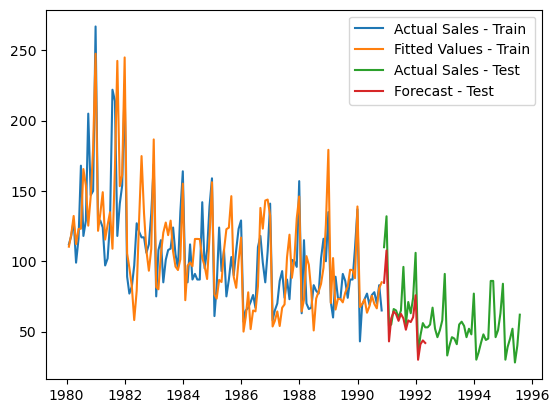

In [198]:
# Fit the best TES model with the optimal parameters
best_model_TES = model_TES.fit(smoothing_level=0.3, smoothing_trend=0.6, smoothing_seasonal=0.4, optimized=False)

# Plot the fitted values for training data
plt.plot(TES_train['Rose'], label='Actual Sales - Train')
plt.plot(best_model_TES.fittedvalues, label='Fitted Values - Train')

# Forecast for the test period and plot
forecasted_values = best_model_TES.forecast(steps=18)
plt.plot(TES_test['Rose'], label='Actual Sales - Test')
plt.plot(forecasted_values, label='Forecast - Test')

plt.legend()
plt.show()

In [199]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.6,Gamma=0.4,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                    47.951776
2pointTrailingMovingAverage                         12.395705
4pointTrailingMovingAverage                         16.389817
6pointTrailingMovingAverage                         16.862447
9pointTrailingMovingAverage                         17.600714
Alpha=0.995,SimpleExponentialSmoothing              29.562842
Alpha=0.995,SimpleExponentialSmoothing              29.562842
Alpha=0.1027,SimpleExponentialSmoothing             29.562842
Alpha=0.995,SimpleExponentialSmoothing              29.562842
Alpha=0.3,SimpleExponentialSmoothing                22.438119
Alpha=0.9,SimpleExponentialSmoothing                22.438119
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18.462692
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...  11.546799
Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialS...  17.556587
Alpha=0.3,Beta=0.6,Gamma=0.4,TripleExponentialS...  17.556587

In [200]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...  11.546799
2pointTrailingMovingAverage                         12.395705
4pointTrailingMovingAverage                         16.389817
6pointTrailingMovingAverage                         16.862447
Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialS...  17.556587
Alpha=0.3,Beta=0.6,Gamma=0.4,TripleExponentialS...  17.556587
9pointTrailingMovingAverage                         17.600714
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18.462692
Alpha=0.3,SimpleExponentialSmoothing                22.438119
Alpha=0.9,SimpleExponentialSmoothing                22.438119
Alpha=0.995,SimpleExponentialSmoothing              29.562842
Alpha=0.995,SimpleExponentialSmoothing              29.562842
Alpha=0.1027,SimpleExponentialSmoothing             29.562842
Alpha=0.995,SimpleExponentialSmoothing              29.562842
RegressionOnTime                                    47.951776

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters α
 = 0.3, β
 = 0.6 and γ
 = 0.4.

In [211]:
print(TES_test.columns)

Index([                                                                 'Rose',
                                                                'auto_predict',
                                                    ('predict', 0.3, 0.3, 0.3),
                                                    ('predict', 0.3, 0.3, 0.4),
                                                    ('predict', 0.3, 0.3, 0.5),
                                     ('predict', 0.3, 0.3, 0.6000000000000001),
                                     ('predict', 0.3, 0.3, 0.7000000000000002),
                                     ('predict', 0.3, 0.3, 0.8000000000000003),
                                     ('predict', 0.3, 0.3, 0.9000000000000001),
                                     ('predict', 0.3, 0.3, 1.0000000000000002),
       ...
       ('predict', 1.0000000000000002, 0.9000000000000001, 0.9000000000000001),
       ('predict', 1.0000000000000002, 0.9000000000000001, 1.0000000000000002),
                      ('predi

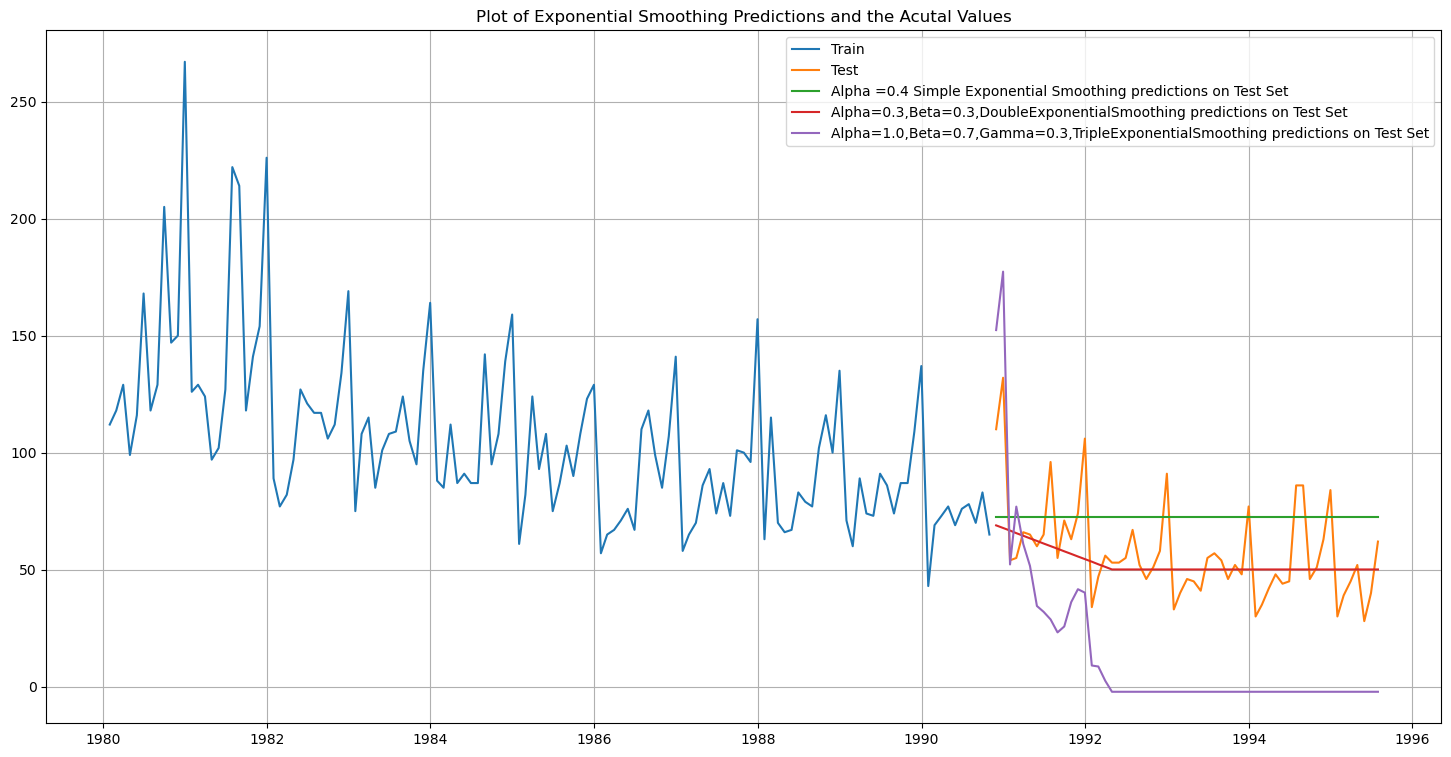

In [222]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.3, 0.3, 0.8000000000000003], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In this particular we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. 

For this particular model, we will go ahead and build only the top model which gave us the best accuracy (least RMSE).

The model to be built on the whole data are the following:

Alpha=0.3,Beta=0.3,Gamma=0.8,TripleExponentialSmoothing

In [223]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.6,
                                                                 smoothing_seasonal=0.4)

C:\Users\Aniesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [225]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 23.580601641627393


In [226]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=len(test))

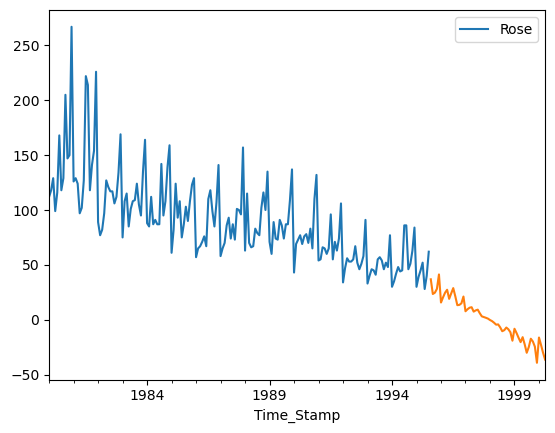

In [227]:
df.plot()
prediction_1.plot();

In [228]:
#One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [229]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction   upper_ci
1995-08-31  -9.470406   36.840068  83.150543
1995-09-30 -22.859439   23.451035  69.761509
1995-10-31 -21.678175   24.632299  70.942773
1995-11-30 -18.201618   28.108856  74.419330
1995-12-31  -5.048029   41.262445  87.572919

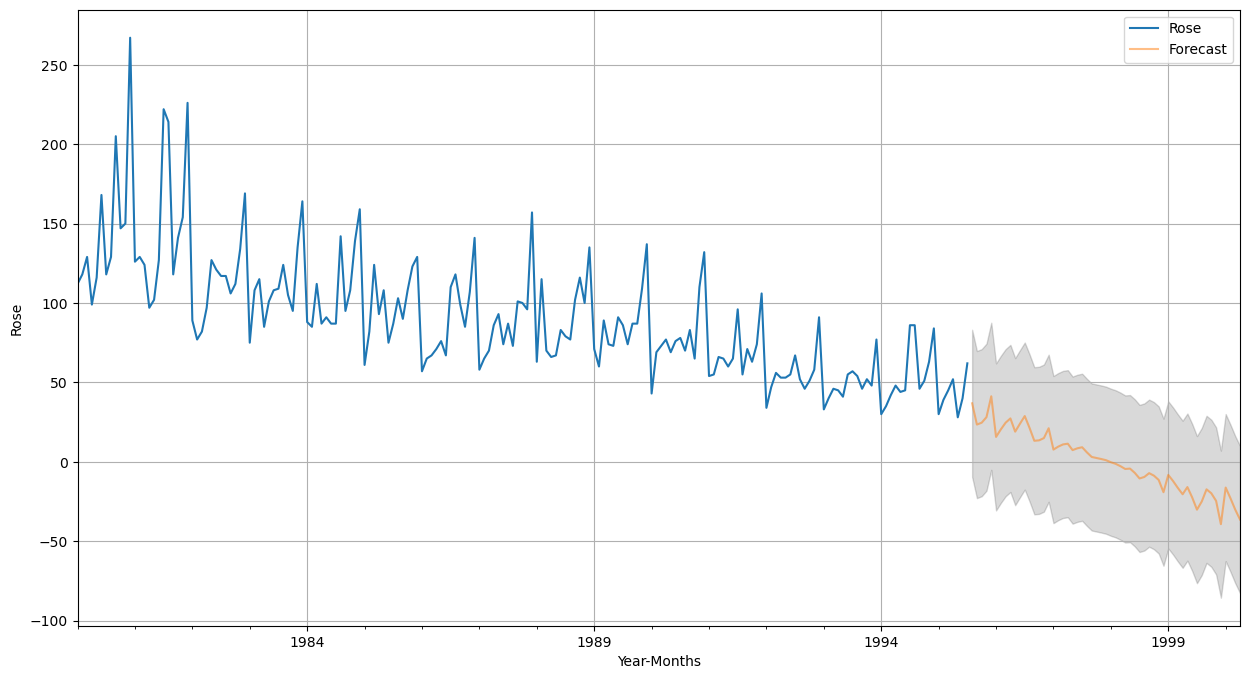

In [230]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

Let us now build the second model using the same parameters on the full data and check the confidence bands when we forecast into the future for the length of the test set.

In [237]:
fullmodel2 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.6,
                                                                 smoothing_seasonal=0.4)

C:\Users\Aniesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [238]:
RMSE_fullmodel2 = metrics.mean_squared_error(df['Rose'],fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)

RMSE: 23.580601641627393


In [239]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel2.forecast(steps=len(test))

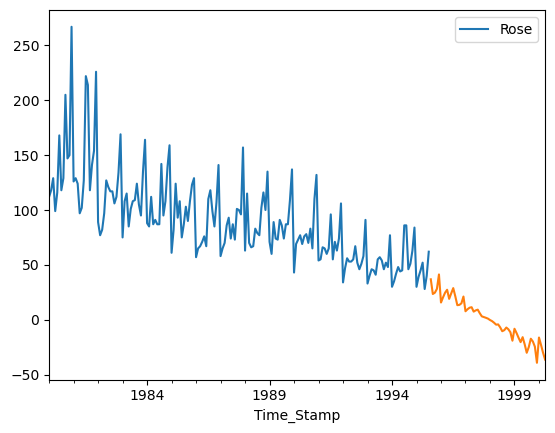

In [240]:
df.plot()
prediction_2.plot();

In [241]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_2_df.head()

lower_CI  prediction   upper_ci
1995-08-31  -9.470406   36.840068  83.150543
1995-09-30 -22.859439   23.451035  69.761509
1995-10-31 -21.678175   24.632299  70.942773
1995-11-30 -18.201618   28.108856  74.419330
1995-12-31  -5.048029   41.262445  87.572919

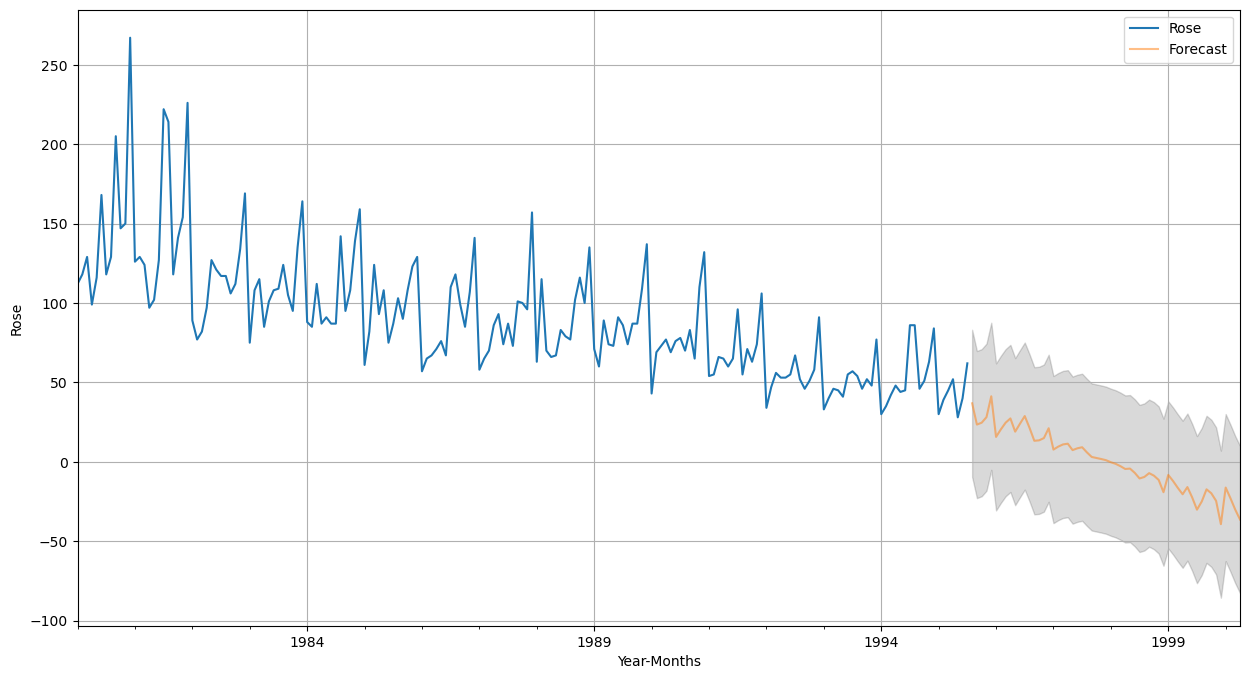

In [242]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

# Check for stationarity of the whole Time Series data.

In [258]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

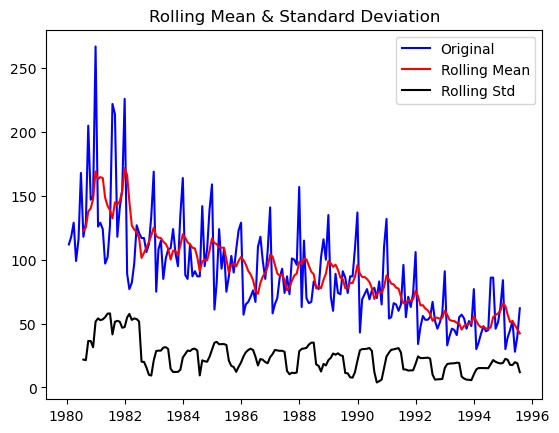

Results of Dickey-Fuller Test:
Test Statistic                  -1.933053
p-value                          0.316675
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [259]:
test_stationarity(df['Rose'])

## Observations:
We see that at 5% significant level the Time Series is non-stationary.
Let us take a difference of order 1 and check whether the Time Series is stationary or not.

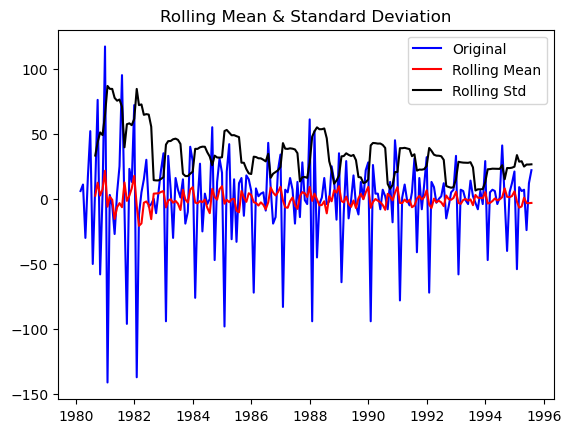

Results of Dickey-Fuller Test:
Test Statistic                -7.890753e+00
p-value                        4.443288e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [260]:
test_stationarity(df['Rose'].diff().dropna())

## Observations:
We see that at α
 = 0.05 the Time Series is indeed stationary.

# Plot the Autocorrelation function plots on the whole data.

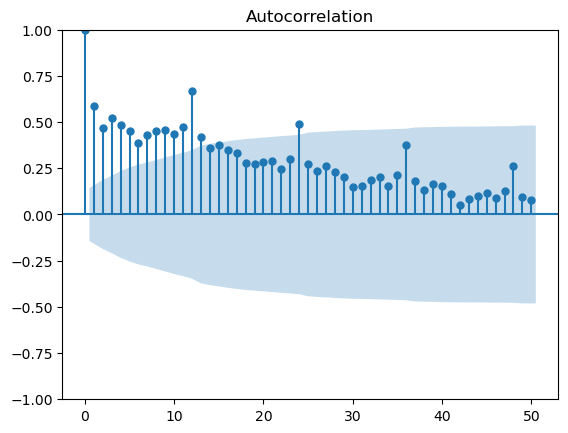

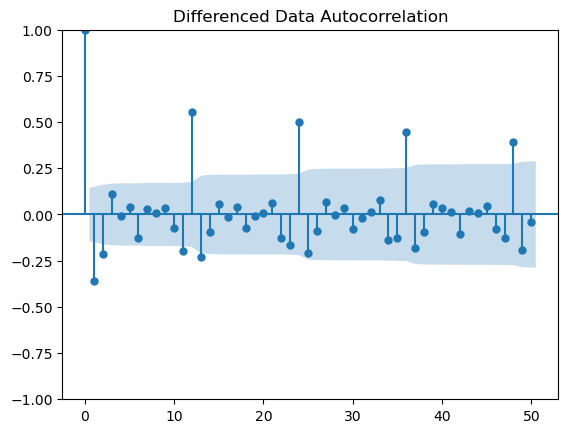

In [261]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

## Observations:
From the above plots, we can say that there seems to be a seasonality in the data.

# Split the data into train and test and plot the training and test data.

In [279]:
# Training Data is till the end of 1989. Test Data is from the beginning of 1990 to the last time stamp provided.
train=df[df.index.year < 1990]
test=df[df.index.year >= 1990]

In [280]:
## This is to display multiple data frames from one cell
from IPython.display import display
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1989-08-31   74.0
1989-09-30   87.0
1989-10-31   87.0
1989-11-30  109.0
1989-12-31  137.0

First few rows of Test Data


Rose
Time_Stamp      
1990-01-31  43.0
1990-02-28  69.0
1990-03-31  73.0
1990-04-30  77.0
1990-05-31  69.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [281]:
print(train.shape)
print(test.shape)

(120, 1)
(67, 1)


## Check for stationarity of the Training Data Time Series.

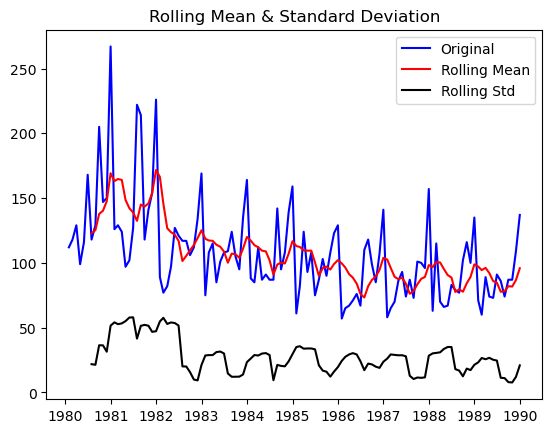

Results of Dickey-Fuller Test:
Test Statistic                  -2.192106
p-value                          0.209123
#Lags Used                      13.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64 



In [282]:
test_stationarity(train['Rose'])

## Observations:
We see that the series is not stationary at α
 = 0.05.

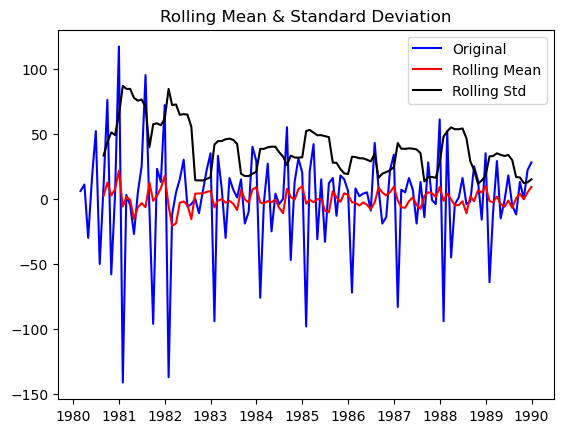

Results of Dickey-Fuller Test:
Test Statistic                -6.098139e+00
p-value                        9.984981e-08
#Lags Used                     1.200000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64 



In [283]:

test_stationarity(train['Rose'].diff().dropna())

## Observations:
We see that after taking a difference of order 1 the series have become stationary at α
 = 0.05.

In [284]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 1980-01-31 to 1989-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    120 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


# Build an Automated version of an ARMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [285]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we necessary for an ARMA model 

import itertools
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [286]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [287]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARMA_model.aic))
    ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:1205.524103106785
ARIMA(0, 0, 1) - AIC:1188.9873702355376
ARIMA(0, 0, 2) - AIC:1190.439999542578
ARIMA(1, 0, 0) - AIC:1186.1422208160523
ARIMA(1, 0, 1) - AIC:1181.80485003352


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\825564052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\825564052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\825564052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\825564052.py:6: FutureWarning: The frame.append method is deprecated and will be remo

ARIMA(1, 0, 2) - AIC:1179.5462248871027
ARIMA(2, 0, 0) - AIC:1187.3287830974414
ARIMA(2, 0, 1) - AIC:1180.3876025800957


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\825564052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\825564052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\Aniesh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Aniesh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting par

ARIMA(2, 0, 2) - AIC:1179.9184351568151


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\825564052.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)


In [288]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
5  (1, 0, 2)  1179.546225
8  (2, 0, 2)  1179.918435
7  (2, 0, 1)  1180.387603
4  (1, 0, 1)  1181.804850
3  (1, 0, 0)  1186.142221
6  (2, 0, 0)  1187.328783
1  (0, 0, 1)  1188.987370
2  (0, 0, 2)  1190.440000
0  (0, 0, 0)  1205.524103

In [289]:
auto_ARIMA = ARIMA(train['Rose'], order=(1,0,0),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  120
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -590.071
Date:                Sun, 15 Sep 2024   AIC                           1186.142
Time:                        00:49:37   BIC                           1194.505
Sample:                    01-31-1980   HQIC                          1189.538
                         - 12-31-1989                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.7474      7.005     15.381      0.000      94.018     121.477
ar.L1          0.4033      0.078      5.204      0.000       0.251       0.555
sigma2      1091.3418    100.259     10.885      0.0

C:\Users\Aniesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [290]:
len(test)

67

In [291]:
#Predict on the Test Set using this model and evaluate the model.
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [292]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

52.48748916116667


In [293]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,0,0)'])

resultsDf

RMSE
ARIMA(1,0,0)  52.487489

# Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [294]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [295]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [364]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1214.7663925264944
ARIMA(0, 1, 1) - AIC:1170.0196891094563
ARIMA(0, 1, 2) - AIC:1167.498635750477
ARIMA(1, 1, 0) - AIC:1200.9156052822857
ARIMA(1, 1, 1) - AIC:1168.3590277281346
ARIMA(1, 1, 2) - AIC:1167.897376540505
ARIMA(2, 1, 0) - AIC:1183.9058474103194
ARIMA(2, 1, 1) - AIC:1169.4637207845421


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\1652561359.py:6: FutureWarning: The frame.append method is deprecated and

ARIMA(2, 1, 2) - AIC:1169.896047656799


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\1652561359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [297]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

Empty DataFrame
Columns: [param, AIC]
Index: []

In [300]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  120
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -580.732
Date:                Sun, 15 Sep 2024   AIC                           1169.464
Time:                        00:49:59   BIC                           1180.580
Sample:                    01-31-1980   HQIC                          1173.978
                         - 12-31-1989                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1913      0.084      2.290      0.022       0.028       0.355
ar.L2         -0.0921      0.111     -0.828      0.407      -0.310       0.126
ma.L1         -0.9062      0.063    -14.428      0.0

C:\Users\Aniesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [301]:
## Predict on the Test Set using this model and evaluate the model.

predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [302]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)


39.12047327118665


In [303]:
temp_resultsDf0 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,1)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf0])
resultsDf

RMSE
ARIMA(1,0,0)  52.487489
ARIMA(2,1,1)  39.120473

# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

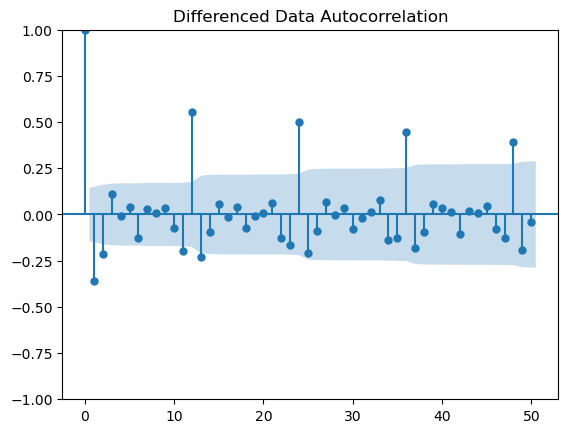

In [305]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

## Observations: 
Setting the seasonality as 12 to estimate parametrs using auto SARIMA model.

In [318]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [319]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [320]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1205.5480023704872
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1030.1031252093699
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:866.6841650054021
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1029.2277244726533


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Loca

SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1007.8700600347139
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:862.7534181795189
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:855.6430770612633


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:857.6338457318685
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:849.7322407931234
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1151.2001025773322


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:992.4259606297337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:820.5139476975321


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:992.7672450123245
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:954.0793303916591


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:816.8669009090069
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:815.6265768006872


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:816.6826595469946


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:802.5838067927101
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1139.4373115781898
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:975.5645344231267


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:810.002849755635
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:985.0939045392432


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:944.6725165257694


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:803.7467401559975
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:814.5425996136985


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:815.813784416769


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:790.0227361866579
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1191.6975123613104
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1024.2270459083566
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:855.006078074588


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Loca

SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1016.0724525829082
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:999.3728690965696


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:851.2648446429421
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:834.637116908153
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:836.5867753427922


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:838.5725215774378
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1149.9301044429483
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:987.063103023954


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:819.3998663431554
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:979.9095154405169


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:953.9953889561821
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:814.641145618518


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:807.2861985059067
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:808.800322328109


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:802.1931793009444
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1139.9010532872999
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:977.561400127275


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:811.9526047726531
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:977.8885535596545


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:942.3312499087629


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:805.6865526163897


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:807.7154799335347


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:809.1028619930744


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:791.8431158759753
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1165.4934482426024
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1018.0676313753498


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:851.4739988528138
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:992.633152507399
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:972.0630472053394


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:846.6693362945722
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:821.8338736011855


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:823.5749836028934
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:825.5583246922214


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1151.1599564396429
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:985.9650503359873


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:819.891838012268
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:967.983902493945


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:952.5038318414913


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:814.8734034860053


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:798.4355004146853


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:799.5987097741663


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:801.591506930201
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1141.874611306452


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:975.4093023823731


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:813.1901422204668


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:973.3846148036401


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:943.8930619804382


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:806.1134084834162


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:799.1463083007891


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:800.1735207818471


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:792.8514475813892


C:\Users\Aniesh\AppData\Local\Temp\ipykernel_20712\2980737081.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [321]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  790.022736
53  (1, 1, 2)  (2, 0, 2, 12)  791.843116
80  (2, 1, 2)  (2, 0, 2, 12)  792.851448
69  (2, 1, 1)  (2, 0, 0, 12)  798.435500
78  (2, 1, 2)  (2, 0, 0, 12)  799.146308

In [324]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  120
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -470.669
Date:                           Sun, 15 Sep 2024   AIC                            955.338
Time:                                   00:53:19   BIC                            973.848
Sample:                                        0   HQIC                           962.837
                                           - 120                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6460      0.105     -6.167      0.000      -0.851      -0.441
ma.L2         -0.2231      0.099     -2.265

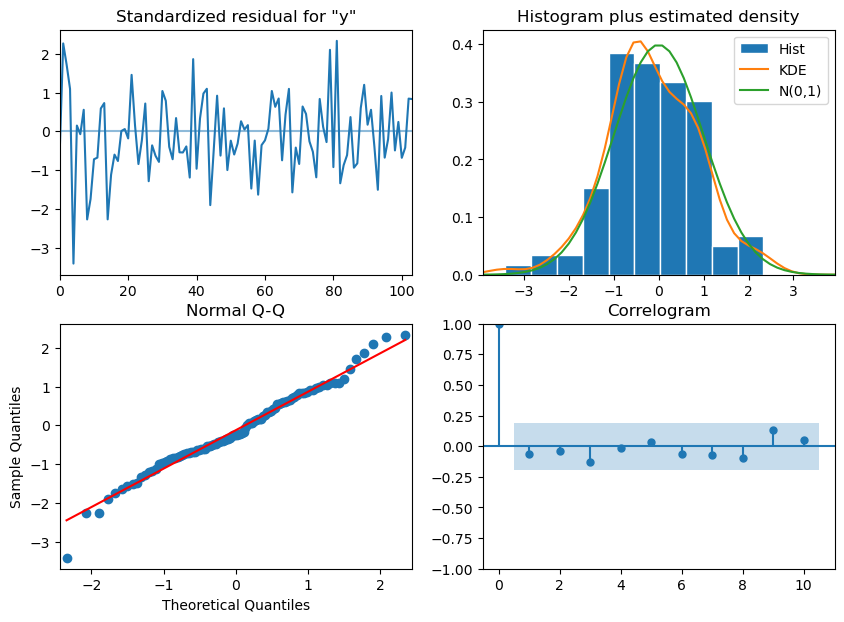

In [362]:
plt.rcParams['figure.figsize'] = [10, 7]
results_auto_SARIMA.plot_diagnostics()
plt.show()

## Observations:
From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

Predict on the Test Set using this model and evaluate the model.

In [326]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [327]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  87.672757  21.967922      44.616421     130.729093
1  87.631957  23.303638      41.957665     133.306249
2  82.824968  23.480344      36.804340     128.845597
3  74.399281  23.655730      28.034903     120.763659
4  83.232062  23.829824      36.526464     129.937659

In [328]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse)

36.07724468856455


In [329]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(1,0,0)             52.487489
ARIMA(2,1,1)             39.120473
SARIMA(0,1,2)(2,0,2,6)   36.077245
SARIMA(0,1,2)(2,0,2,12)  36.077245

## Observations:
SARIMA models are clearly more suited for this dataset as they provide a significantly lower RMSE, indicating better predictive power by capturing the seasonal patterns.

# Building the most optimum model on the Full Data.

In [330]:

full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Aniesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Aniesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -651.908
Date:                            Sun, 15 Sep 2024   AIC                           1317.816
Time:                                    00:54:18   BIC                           1339.299
Sample:                                01-31-1980   HQIC                          1326.540
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7459      0.082     -9.116      0.000      -0.906      -0.585
ma.L2         -0.1620      0.076   

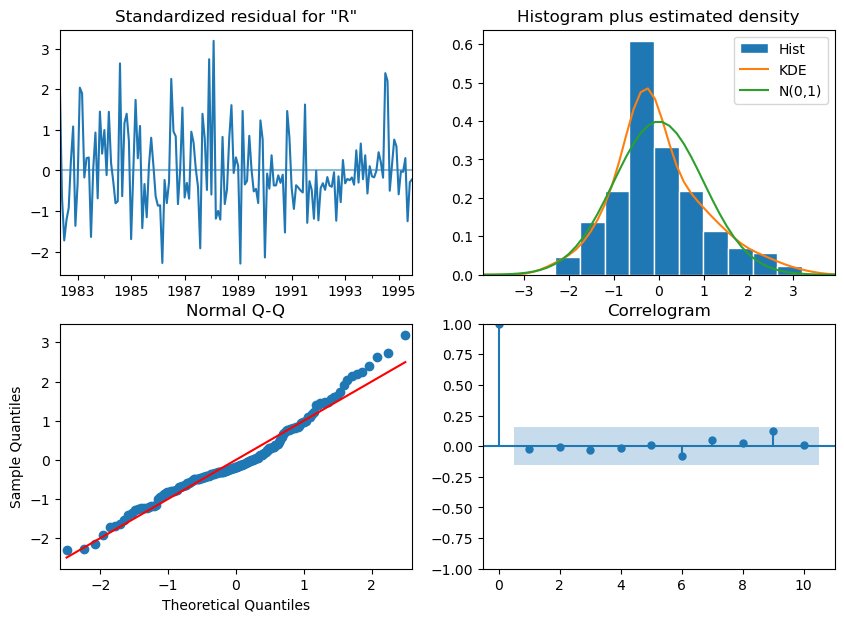

In [363]:
plt.rcParams['figure.figsize'] = [10, 7]
results_full_data_model.plot_diagnostics();

In [334]:
#Predicting 12 months next year
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [335]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  62.670500  14.527735      34.196663      91.144337
1995-09-30  44.944921  14.989556      15.565931      74.323911
1995-10-31  48.147710  15.049171      18.651876      77.643544
1995-11-30  53.468643  15.108552      23.856426      83.080860
1995-12-31  70.527607  15.167699      40.799462     100.255751

In [338]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 27.850516552476417


In [340]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

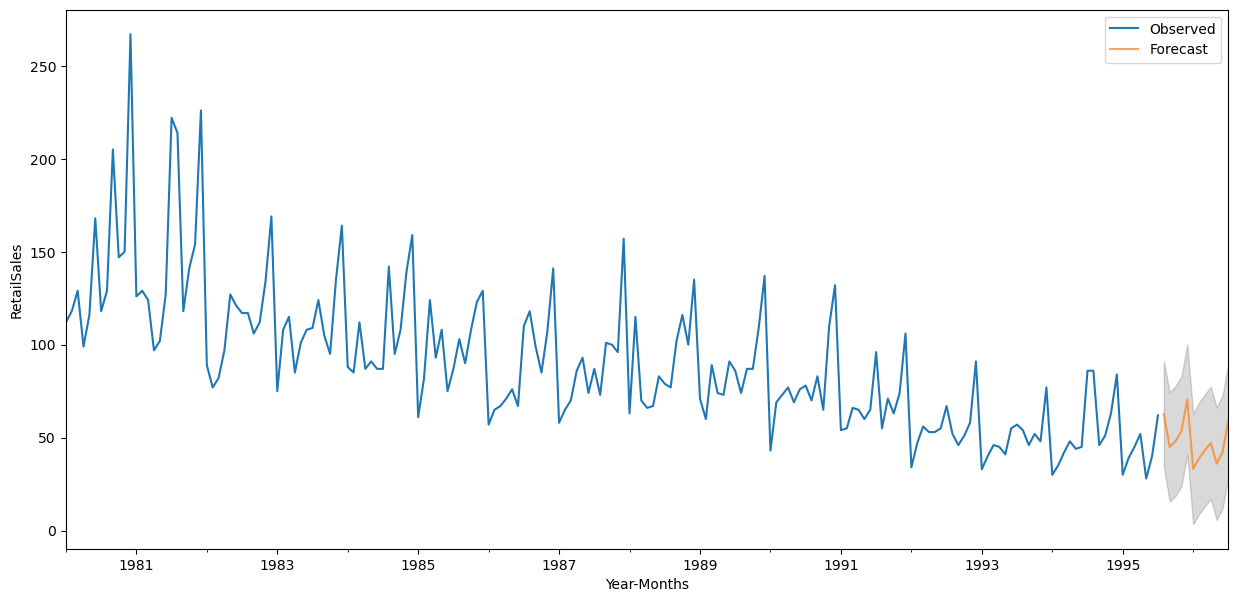

In [366]:
# plot the forecast along with the confidence band
plt.rcParams['figure.figsize'] = [15, 7]
axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()

In [343]:
resultsDf

RMSE
ARIMA(1,0,0)             52.487489
ARIMA(2,1,1)             39.120473
SARIMA(0,1,2)(2,0,2,6)   36.077245
SARIMA(0,1,2)(2,0,2,12)  36.077245